<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_02_DNN%EA%B8%B0%EC%B4%88_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%AA%A8%EB%8D%B8%EB%A7%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜: 2022-06-27
* 이름: 김민규

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대해서 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


In [ ]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.8.2'

## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [ ]:
# 모든 레이어는 tensorflow.keras에 있다.
from tensorflow.keras import layers, models

x = layers.Input(shape=(3), name='input_layer') # X : (데이터개수,3)
y = layers.Dense(1, name='output_layer')(x) # Linear : W, b  Dense(output_shape)

model1 = models.Model(inputs=x, outputs=y, name='Model_1')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


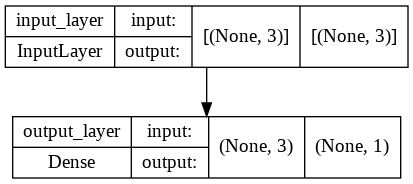

In [ ]:
from tensorflow.keras import  utils

# Output shape : 데이터 변환 과정
# None: 데이터 개수
# Param # : 파라미터 개수 
model1.summary()
utils.plot_model(model1, show_shapes=True)

# Trainable param : 학습 가능한 파라미터 (역전파 통해서 업데이트)
# Non-trainable param : 학습 하지 않는 파라미터

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `model.layer.output`


In [ ]:
# output : 데이터의 변환 과정
for layer in model1.layers:
  print(layer.name) # 각 레이어의 이름
  print(layer.output.shape) # 각 레이어의 아웃풋의 shape

input_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [ ]:
'''
W : (3, 1)
B : (1, )
'''
for param in model1.get_weights():
  print(param.shape)

print(model1.get_weights())

(3, 1)
(1,)
[array([[-0.55226123],
       [ 1.0791677 ],
       [-0.12541771]], dtype=float32), array([0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [ ]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = model1.predict(X)
print(Y_pred)

[[-0.85845445  0.11312405  0.10229392]]
[[0.5833415]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

In [ ]:
from tensorflow.keras import layers, models

x = layers.Input(shape=(3), name='input_layer') # X : (데이터개수,3)
y = layers.Dense(2, name='output_layer')(x) # Linear : W, b  Dense(output_shape)

model2 = models.Model(inputs=x, outputs=y, name='Model_2')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


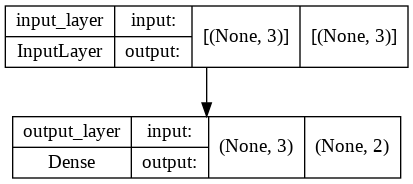

In [ ]:
from tensorflow.keras import  utils

# Output shape : 데이터 변환 과정
# None: 데이터 개수
# Param # : 파라미터 개수 
model2.summary()
utils.plot_model(model2, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [ ]:
# output : 데이터의 변환 과정
for layer in model2.layers:
  print(layer.name) # 각 레이어의 이름
  print(layer.output.shape) # 각 레이어의 아웃풋의 shape

input_layer
(None, 3)
output_layer
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [ ]:
for param in model2.get_weights():
  print(param.shape)

print(model2.get_weights())

(3, 2)
(2,)
[array([[-0.7888305 , -0.15621239],
       [ 0.03743184, -0.1228857 ],
       [ 0.24183321, -1.0745862 ]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [ ]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = model1.predict(X)
print(Y_pred)

[[0.91397112 0.03055434 2.63596367]]
[[-0.8023741]]


### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


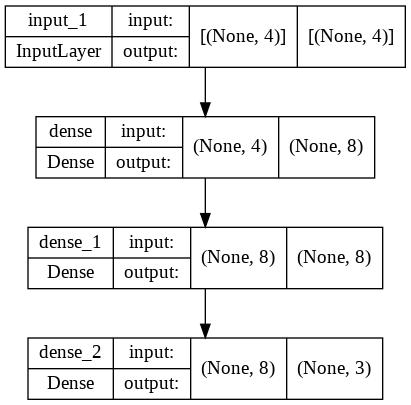

In [ ]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape=(4,))
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)
model4 = models.Model(inputs=x, outputs=y, name='Model_4')

model4.summary()
utils.plot_model(model4, show_shapes=True)

#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [ ]:
'''
X : (N,4) N은 데이터 개수
Z1: (N,8)
Z2: (N,8)
Y : (N,3)
'''

for layer in model4.layers:
  print(layer.output.shape)

(None, 4)
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [ ]:
'''
W1 : (4, 8)
B1 : (8,)
W2 : (8, 8)
B2 : (8,)
W3 : (8,3)
B3 : (3,)
'''

for param in model4.get_weights(): # 모델 파라미터를 확인합니다.
    print(param.shape)

print(model4.get_weights())

(4, 8)
(8,)
(8, 8)
(8,)
(8, 3)
(3,)
[array([[-0.04558957,  0.6257096 ,  0.5923013 , -0.35006934,  0.5310454 ,
        -0.4722288 ,  0.48459226,  0.2706728 ],
       [-0.30286774, -0.05496389,  0.16085023, -0.6691004 , -0.25393426,
        -0.09713179,  0.08820862,  0.65021354],
       [ 0.56965405,  0.2028088 , -0.66715306,  0.44468075,  0.43604165,
        -0.15721786,  0.5990991 ,  0.43090922],
       [-0.12664199,  0.5832606 ,  0.0053857 ,  0.25680864,  0.69204587,
        -0.63302004, -0.34269416,  0.5013425 ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.17869833, -0.2621335 , -0.25351712, -0.07614839, -0.51724845,
        -0.22502795,  0.2682429 ,  0.12736553],
       [ 0.17744172,  0.07740766,  0.28949994, -0.16430396,  0.1524396 ,
        -0.44124854,  0.25347304,  0.10451466],
       [ 0.18853456, -0.5076071 , -0.01862854,  0.581224  ,  0.28995854,
         0.5637726 , -0.22401002,  0.07012546],
       [-0.40141422,  0.25451183,  0.340132

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [ ]:
X = np.random.normal(size=(1,4))
Y_pred = model4.predict(X)
print('X:',X,X.shape)
print('Y_pred:',Y_pred, Y_pred.shape)

X: [[-0.24113728 -2.2410946   0.70981099 -0.35923505]] (1, 4)
Y_pred: [[ 1.5631431  1.0336504 -1.0540411]] (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model4를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [ ]:
# 실제 데이터 ( 1000~100000 중에 배치 단위로 계산이 진행됨 ) 배치 사이즈 : 8, 16, 32, 64, ..
X = np.random.normal(size=(10,4)) # 배치의 개수가 10개다
Y_pred = model4.predict(X)
print('X:',X,X.shape)
print('Y_pred:',Y_pred, Y_pred.shape)

X: [[ 0.24986753  0.09966963  0.28577018  0.65136516]
 [ 1.31311424  0.2665573  -0.20796748 -2.00077581]
 [ 0.55300182 -0.96506831 -1.4157329  -1.48123581]
 [-1.46489839 -0.31454253  1.12944404 -0.36969532]
 [-0.22116358 -0.35111008  1.28845095 -0.11708369]
 [-0.39583829 -2.95623977 -0.23966507  0.61914894]
 [-0.62242698  0.0356556   2.63893141 -2.90841085]
 [-0.80265554 -1.00575075  1.76493615  1.19140593]
 [-0.2425773  -0.42066     2.09403209 -0.68265787]
 [ 1.09951409  0.22523651 -0.10570416 -0.48374994]] (10, 4)
Y_pred: [[-0.0875899  -0.22878546 -0.17913711]
 [-0.22093248 -0.60841835  1.9995258 ]
 [ 0.35643077 -0.20419073  1.7205791 ]
 [ 0.6281528   1.4028432  -1.9572465 ]
 [ 0.5006363   0.6119135  -1.0965285 ]
 [ 1.761808    0.89323074 -1.0333667 ]
 [ 0.78979385  1.6400576  -1.3190584 ]
 [ 0.96798605  1.0575352  -2.502643  ]
 [ 0.74443316  0.96781576 -1.4822927 ]
 [-0.26366198 -0.7086651   1.2238154 ]] (10, 3)


## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import numpy as np
tf.__version__

'2.8.2'

아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [ ]:
# 이 함수를 실행하면 아래와 같은 구성을 가진 모델이 반환
def build_model1():
  x = layers.Input(shape=(3,))
  y = layers.Dense(6)(x)
  y = layers.Dense(6)(y)
  y = layers.Dense(1)(y)
  model = models.Model(x, y)
  return model

* 시각화

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_11 (Dense)            (None, 6)                 24        
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


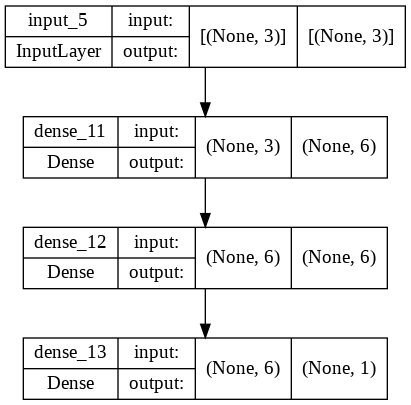

In [ ]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes=True)

### | Keras Sequential API



* 모델 구현: `Sequential()`

In [ ]:
def build_model2():
  model = tf.keras.Sequential() # 빈 껍질을 만들어 놓은것
  model.add( layers.Input(shape=(3,)) )
  model.add( layers.Dense(6))
  model.add( layers.Dense(6))
  model.add( layers.Dense(1))
  return model

* 모델 시각화

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 24        
                                                                 
 dense_15 (Dense)            (None, 6)                 42        
                                                                 
 dense_16 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


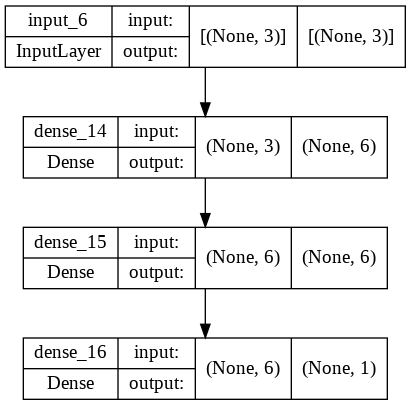

In [ ]:
m2 = build_model2()
m2.summary()
utils.plot_model(m2, show_shapes=True)

### | Model Class Subclassing

* 모델 구현

In [ ]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape=(3)
    self.dense1 = layers.Dense(6, name='dense1')
    self.dense2 = layers.Dense(6, name='dense2')
    self.dense3 = layers.Dense(3, name='dense3')
  
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y



* 모델 시각화

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  21        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


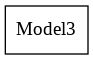

In [ ]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3)

### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


In [38]:
# 이 함수를 실행하면 아래와 같은 구성을 가진 모델이 반환
def build_model4():
  x = layers.Input(shape=(4,))
  y = layers.Dense(8)(x)
  y = layers.Dense(8)(y)
  y = layers.Dense(3)(y)
  model = models.Model(x, y)
  return model

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_17 (Dense)            (None, 8)                 40        
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


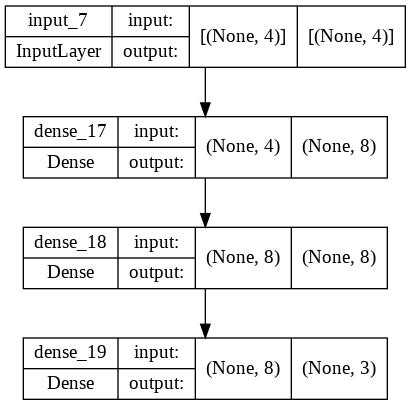

In [39]:
m4 = build_model4()
m4.summary()
utils.plot_model(m4, show_shapes=True)

* keras Sequential API


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_20 (Dense)            (None, 8)                 40        
                                                                 
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dense_22 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


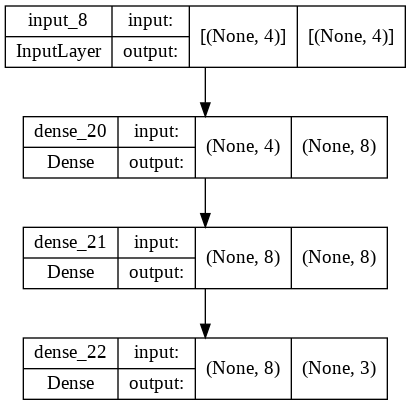

In [40]:
m4 = build_model4()
m4.summary()
utils.plot_model(m4, show_shapes=True)

* Model Class Subsclassing




In [41]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape=(4)
    self.dense1 = layers.Dense(8, name='dense1')
    self.dense2 = layers.Dense(8, name='dense2')
    self.dense3 = layers.Dense(3, name='dense3')
  
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  40        
                                                                 
 dense2 (Dense)              multiple                  72        
                                                                 
 dense3 (Dense)              multiple                  27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


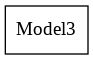

In [42]:
m3 = Model3()
m3(np.array([[1,2,1,5]]))
m3.summary()
utils.plot_model(m3)

#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


In [43]:
def build_model5():
  x = layers.Input(shape=(3,))
  y = layers.Dense(4)(x)
  y = layers.Dense(8)(y)
  y = layers.Dense(4)(y)
  y = layers.Dense(1)(y)
  model = models.Model(x, y)
  return model

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 16        
                                                                 
 dense_24 (Dense)            (None, 8)                 40        
                                                                 
 dense_25 (Dense)            (None, 4)                 36        
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


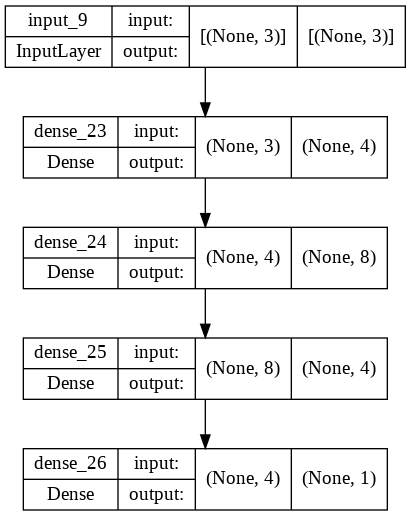

In [44]:
m5 = build_model5()
m5.summary()
utils.plot_model(m5, show_shapes=True)

* keras Sequential API


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 16        
                                                                 
 dense_28 (Dense)            (None, 8)                 40        
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


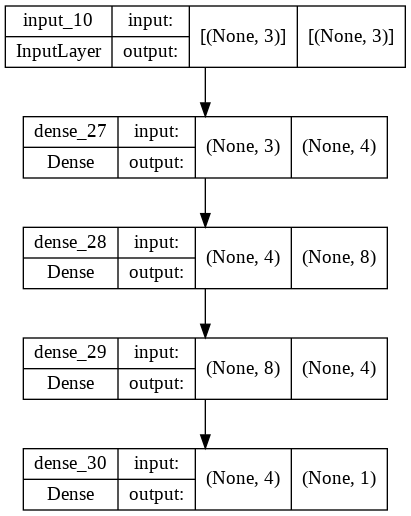

In [45]:
m5 = build_model5()
m5.summary()
utils.plot_model(m5, show_shapes=True)

* Model Class Subsclassing



In [46]:
class Model6(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model6, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model6'
    self._input_shape=(3)
    self.dense1 = layers.Dense(4, name='dense1')
    self.dense2 = layers.Dense(8, name='dense2')
    self.dense3 = layers.Dense(4, name='dense3')
    self.dense4 = layers.Dense(1, name='dense4')
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    y = self.dense4(y)
    return y

Model: "Model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  16        
                                                                 
 dense2 (Dense)              multiple                  40        
                                                                 
 dense3 (Dense)              multiple                  36        
                                                                 
 dense4 (Dense)              multiple                  5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


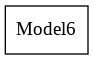

In [47]:
m6 = Model6()
m6(np.array([[2,1,5]]))
m6.summary()
utils.plot_model(m6)